In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [25]:
from sklearn.datasets import make_blobs

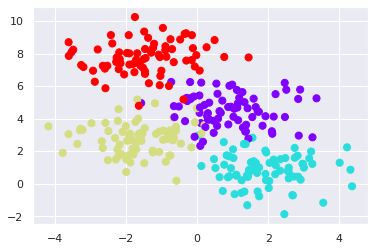

In [26]:
X, y = make_blobs(n_samples=300, centers=4,
 random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [28]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
         clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
         levels=np.arange(n_classes + 1) - 0.5,
         cmap=cmap, clim=(y.min(), y.max()),
         zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'clim'


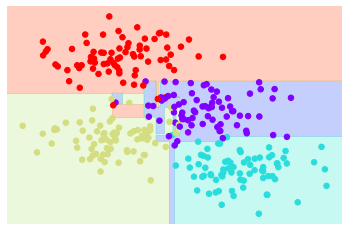

In [29]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [30]:
#Bagging classifire for the random forest
#Random forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'clim'


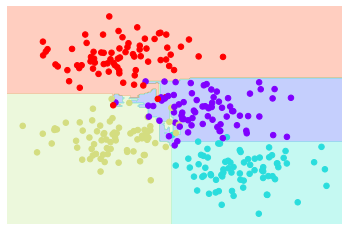

In [31]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
 random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'clim'


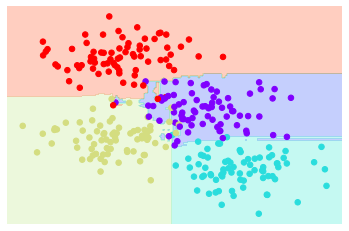

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

In [33]:
#Random forest used also Regression

In [34]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

In [35]:
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

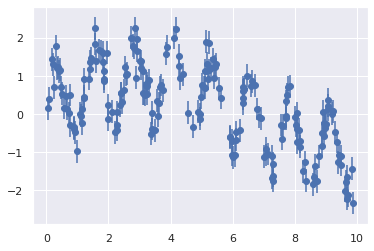

In [36]:
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

In [37]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

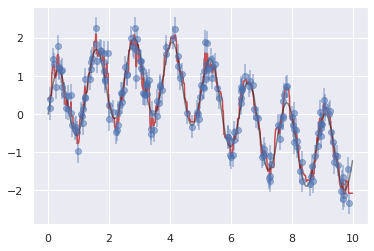

In [40]:
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

## Example: Random Forest for Classifying Digits

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

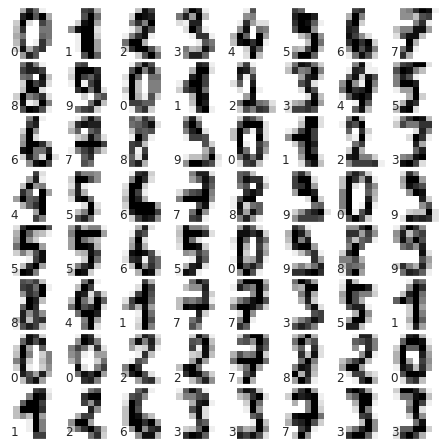

In [46]:
fig = plt.figure(figsize=(6,6,))
fig.subplots_adjust(left=0,right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [56]:
from sklearn import metrics
print('Classification report:\n {}'.format(metrics.classification_report(y_pred,y_test)))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      1.00      0.99        44
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



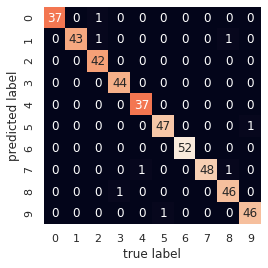

In [58]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');